### Line plot
- 연속적으로 변화하는 값을 순서대로 점으로 나타내고, 이를 선으로 연결한 그래프

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

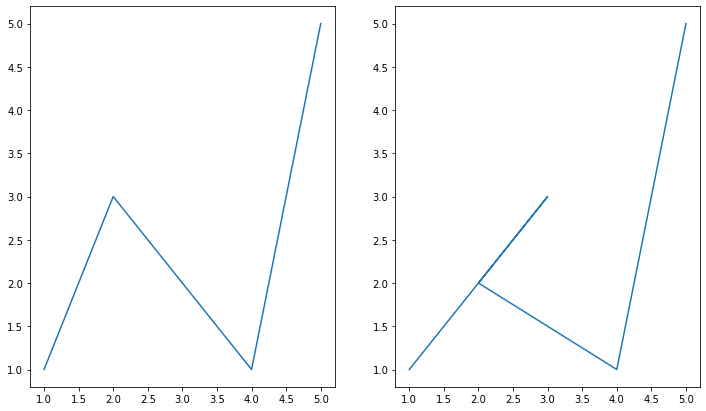

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x1 = [1, 2, 3, 4, 5]
x2 = [1, 3, 2, 4, 5]
y = [1, 3, 2, 1, 5]

axes[0].plot(x1, y)
axes[1].plot(x2, y)

plt.show()

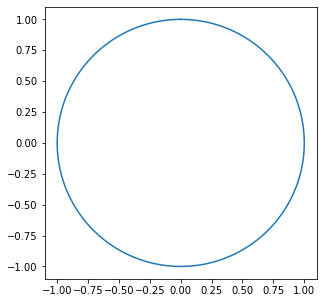

In [6]:
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# 정삼각형을 그리기 위한 방법
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect=1)

n = 1000
x = np.sin(np.linspace(0, 2*np.pi, n))
y = np.cos(np.linspace(0, 2*np.pi, n))

ax.plot(x, y)

plt.show()

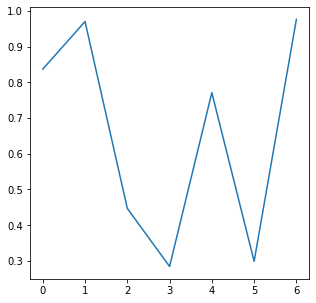

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y)
plt.show()

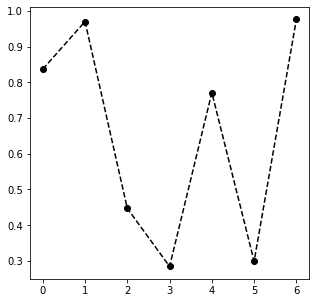

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

# marker  o, ., ^, *
# linestyle solid, dashed, dashdot, dotted, None

ax.plot(x, y,
        color='black',
        marker='o',
        linestyle='--'
        )
plt.show()

In [10]:
stock = pd.read_csv("data/prices.csv")
stock['date'] = pd.to_datetime(stock['date'], format="%Y-%m-%d", errors='raise')
stock.set_index("date", inplace=True)
stock.sample(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-09-23,CBG,17.910000,17.740000,17.709999,18.200001,2578000.0
2012-12-24,IP,39.210003,39.470002,39.000004,39.759997,1346000.0
2015-07-29,AMT,95.660004,96.320000,93.769997,97.470001,3657700.0
2015-12-17,MCHP,47.549999,46.439999,46.439999,47.900002,2358100.0
2010-02-03,ADP,40.860002,40.800003,40.510004,41.020000,3141700.0


In [12]:
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
google.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


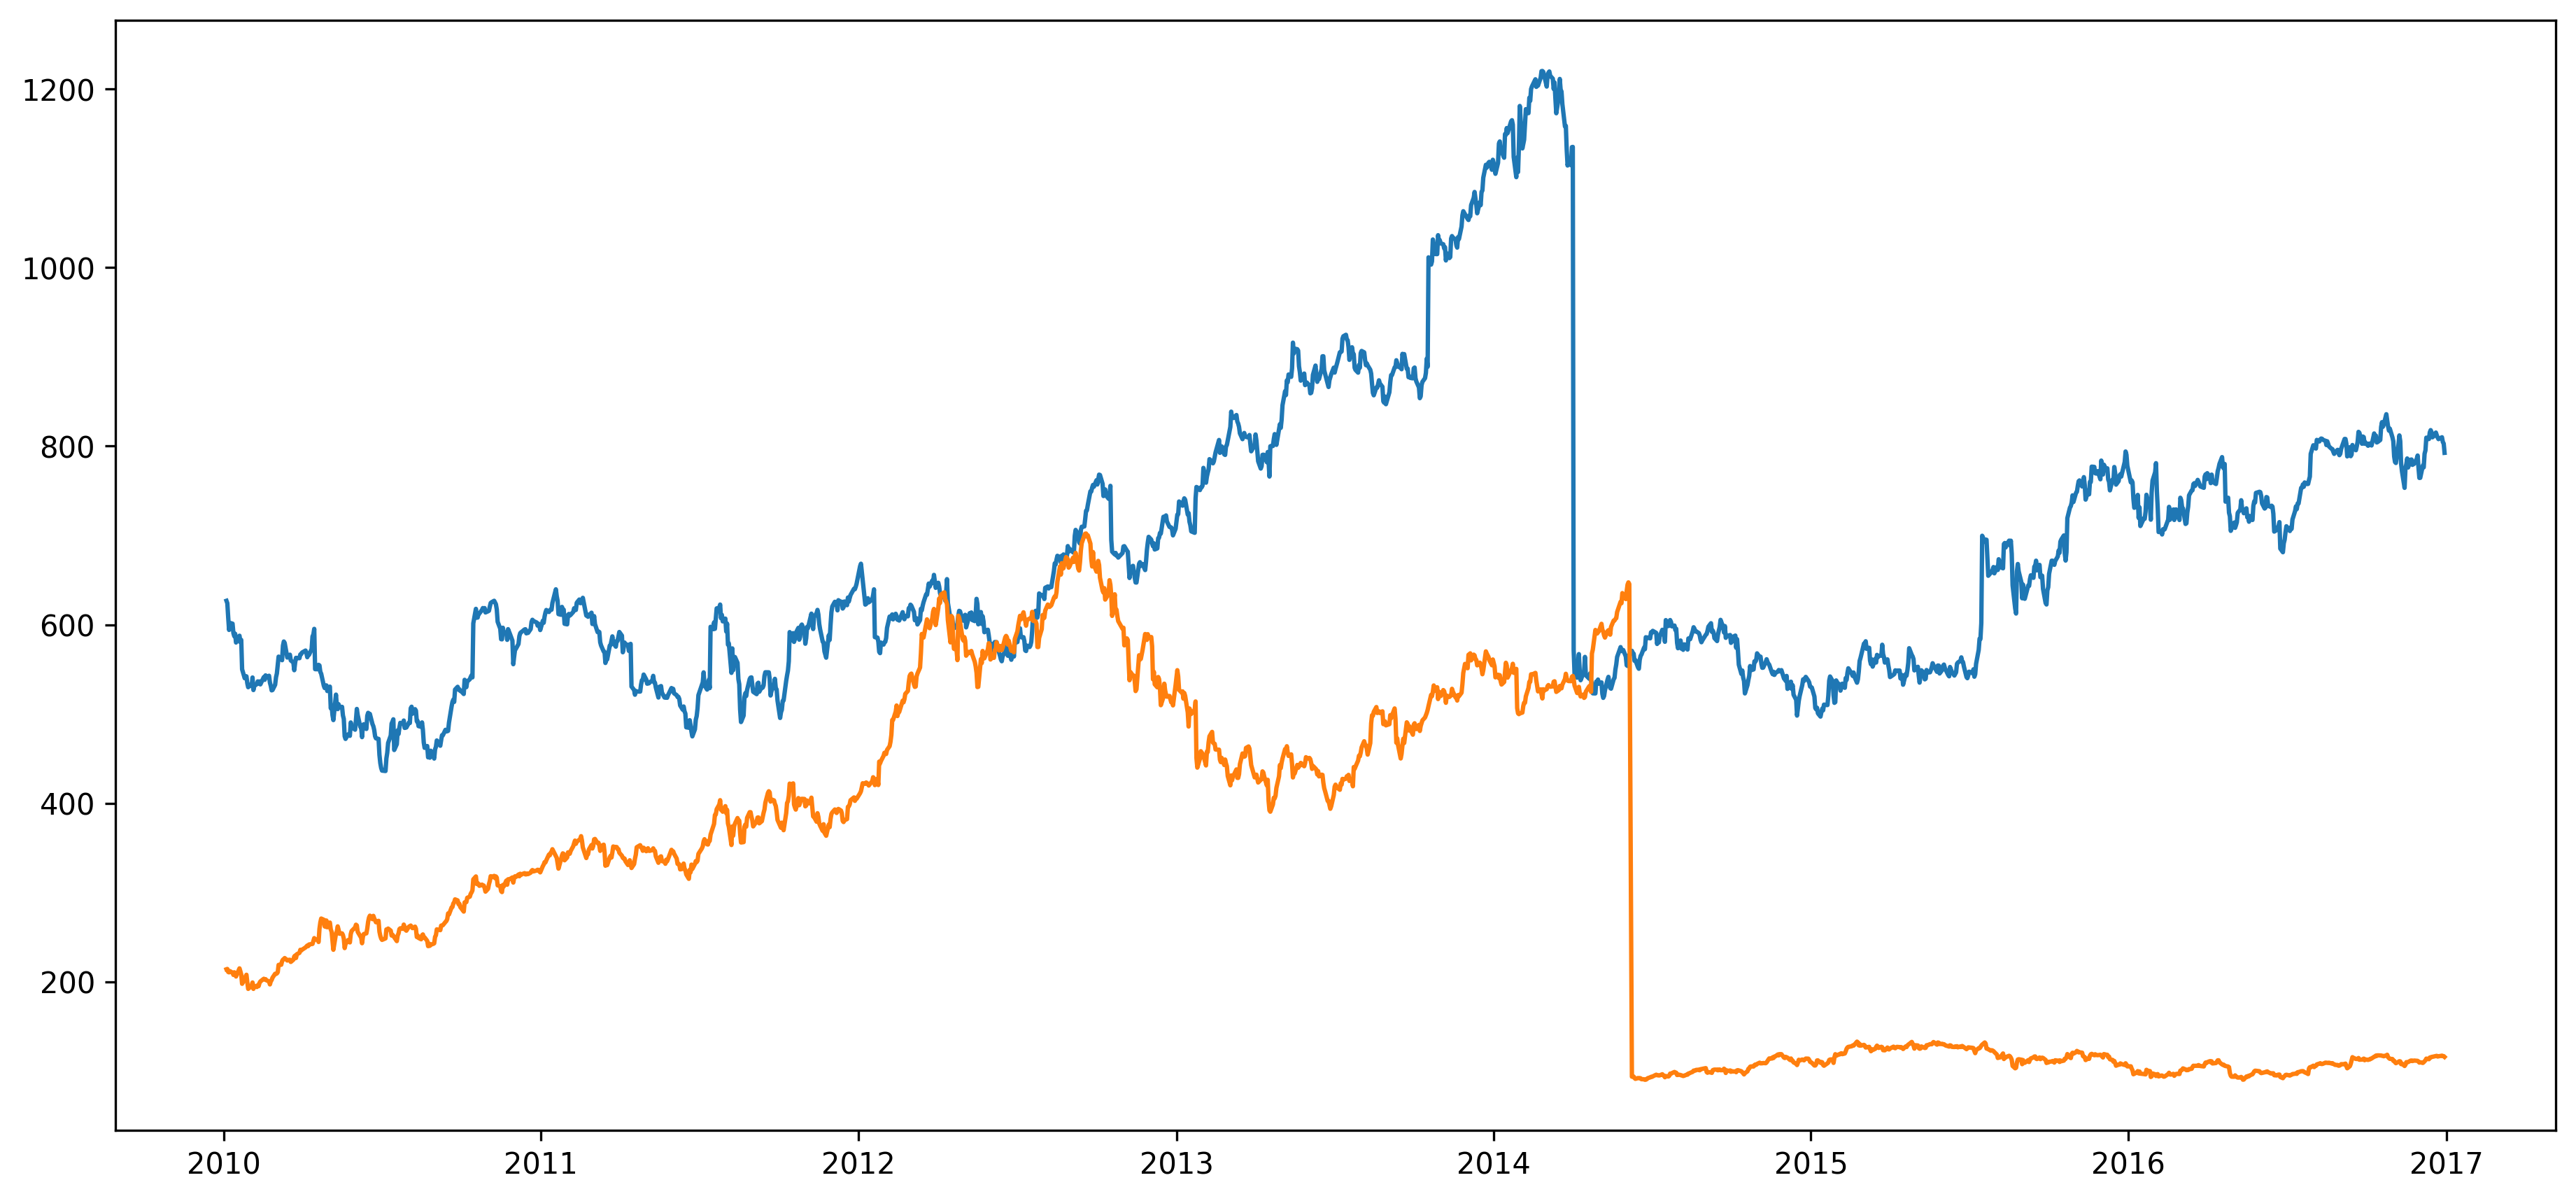

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=300)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])

plt.show()

In [19]:
# 이동평균
google_rolling = google.rolling(window=4).mean()
google_rolling.head(8)

,open,close,low,high,volume
date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,622.347512,613.275019,611.197510,623.302504,7669200.0
2010-01-08,613.610012,607.092518,602.415010,616.737511,9051875.0
2010-01-11,607.930013,601.372520,595.540011,610.892517,11153875.0
2010-01-12,600.877502,596.927507,590.950001,603.967518,11590725.0
2010-01-13,592.650005,595.175004,586.262508,598.562528,11631850.0


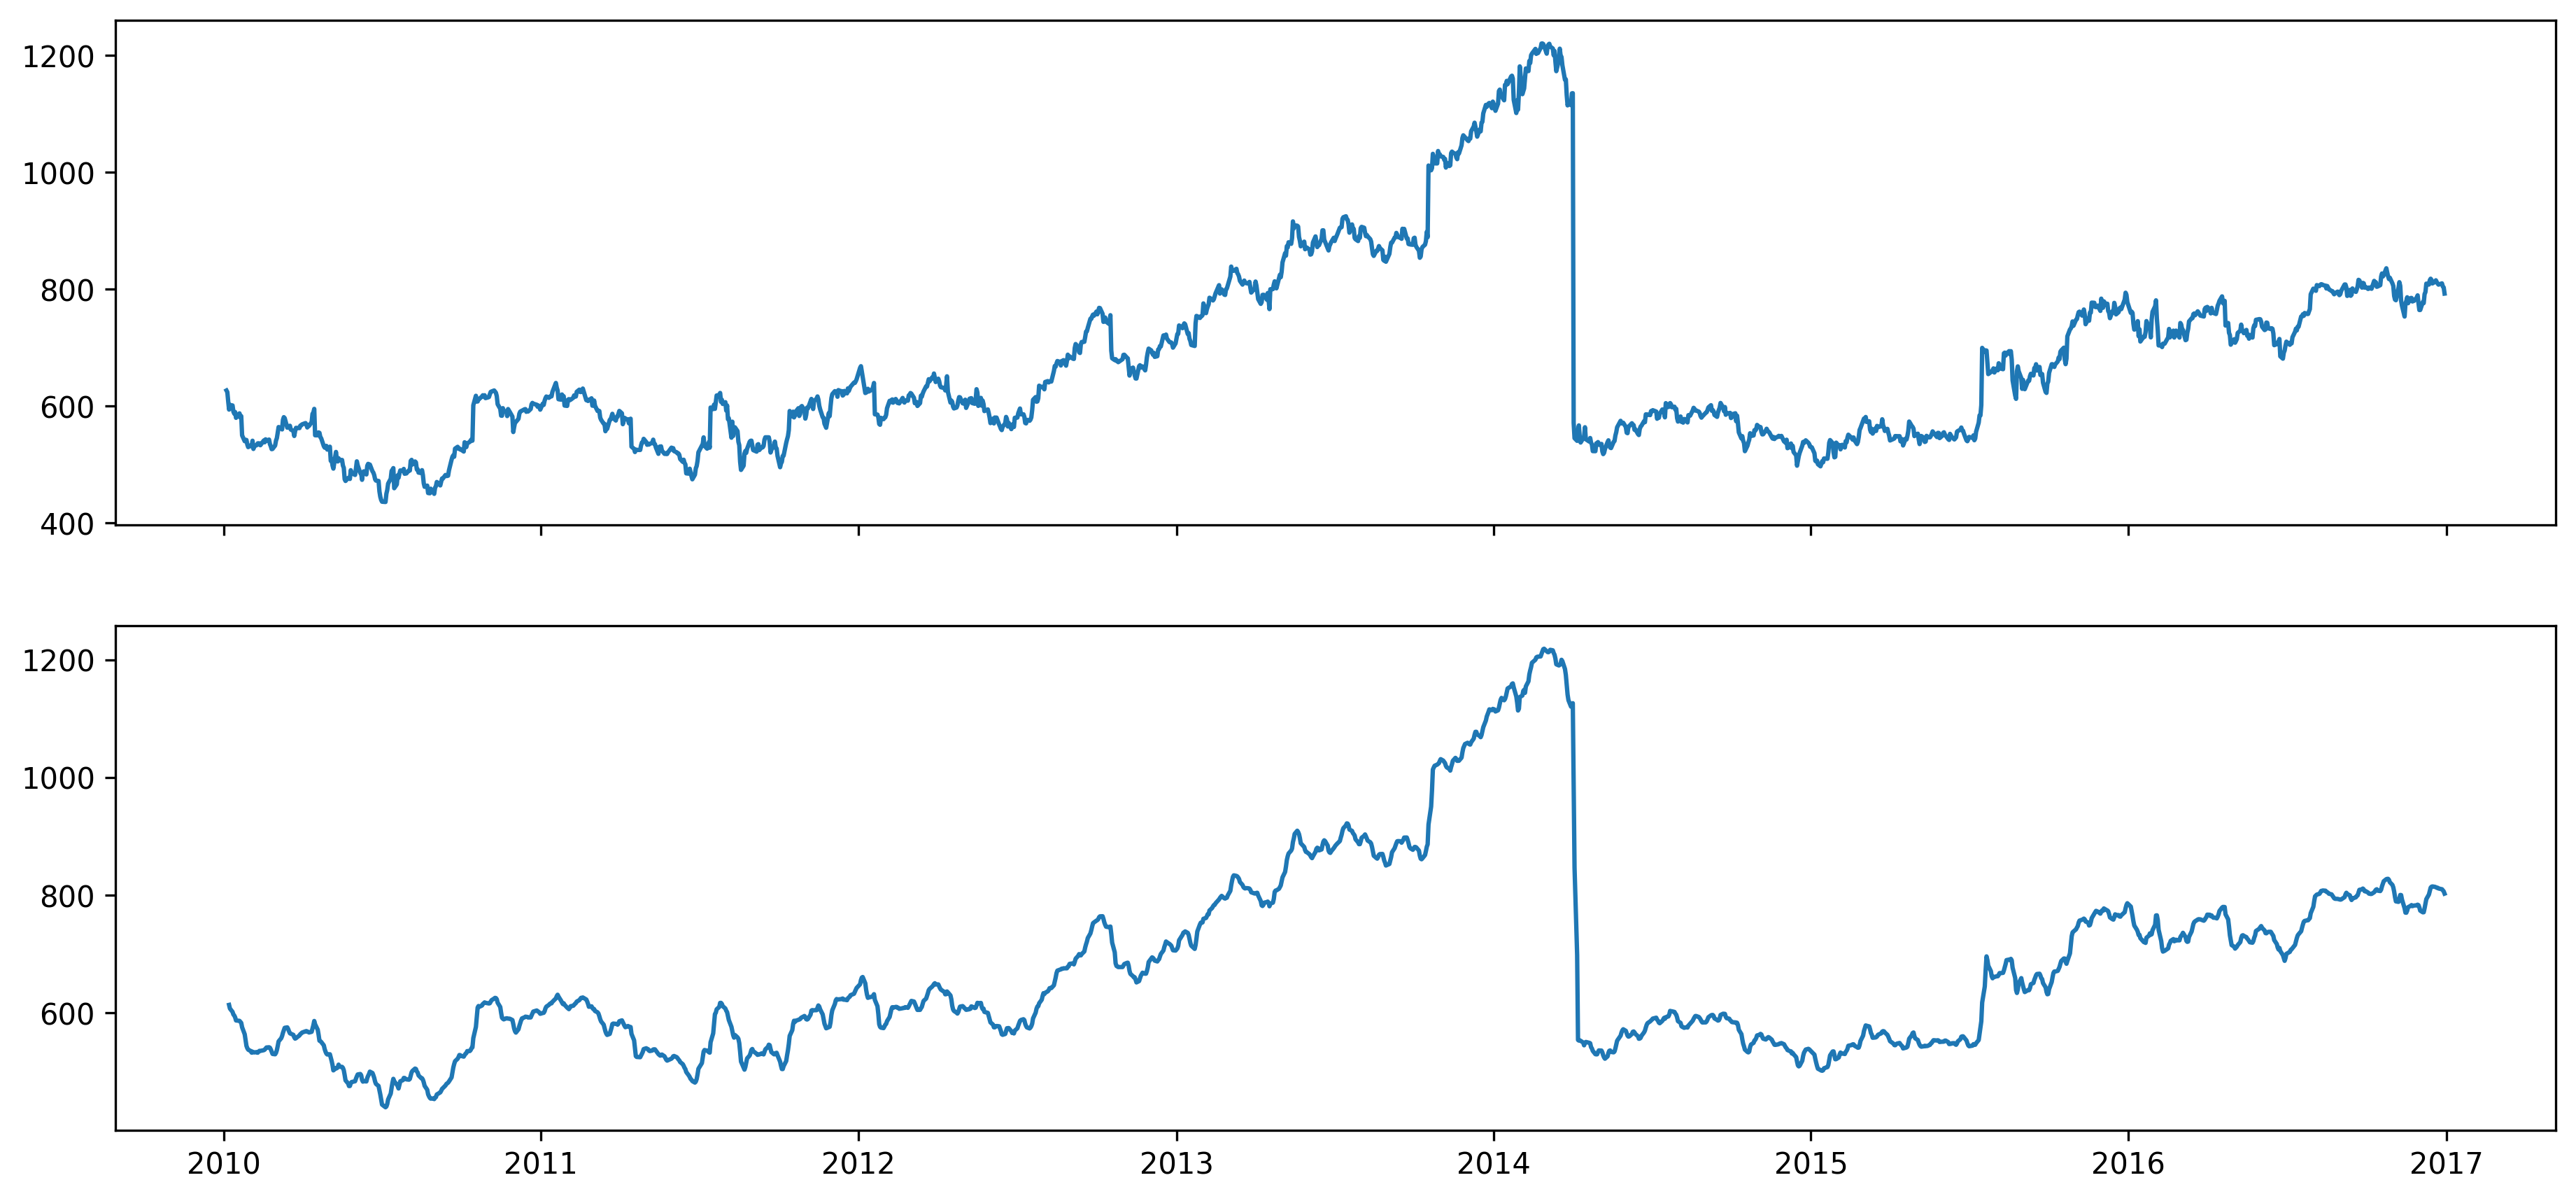

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), dpi=300, sharex=True)

axes[0].plot(google.index, google['close'])
axes[1].plot(google_rolling.index, google_rolling['close'])

plt.show()

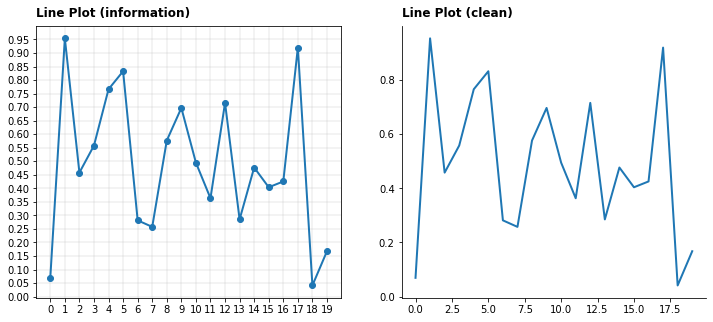

In [22]:
# 추세에 집중
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12,5))

np.random.seed(970725)

x = np.arange(20)
y = np.random.rand(20)

# Ax1
ax1 = fig.add_subplot(121)
ax1.plot(x, y,
        marker='o',
        linewidth=2)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.grid(linewidth=0.3)

# Ax2
ax2 = fig.add_subplot(122)
ax2.plot(x, y,
        linewidth=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_title(f'Line Plot (information)', loc='left', fontsize=12, va='bottom', fontweight='semibold')
ax2.set_title(f'Line Plot (clean)', loc='left', fontsize=12, va='bottom', fontweight='semibold')

plt.show()

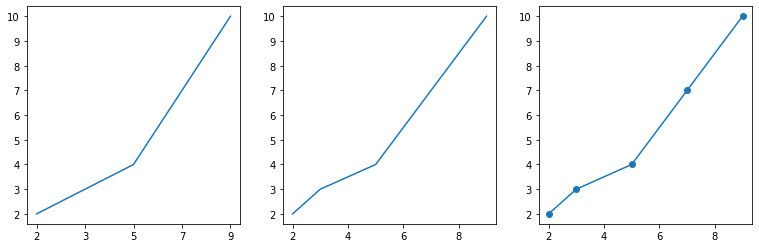

In [23]:
# 간격
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].plot([str(i) for i in x], y)
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')

plt.show()

보간 참고링크
https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/

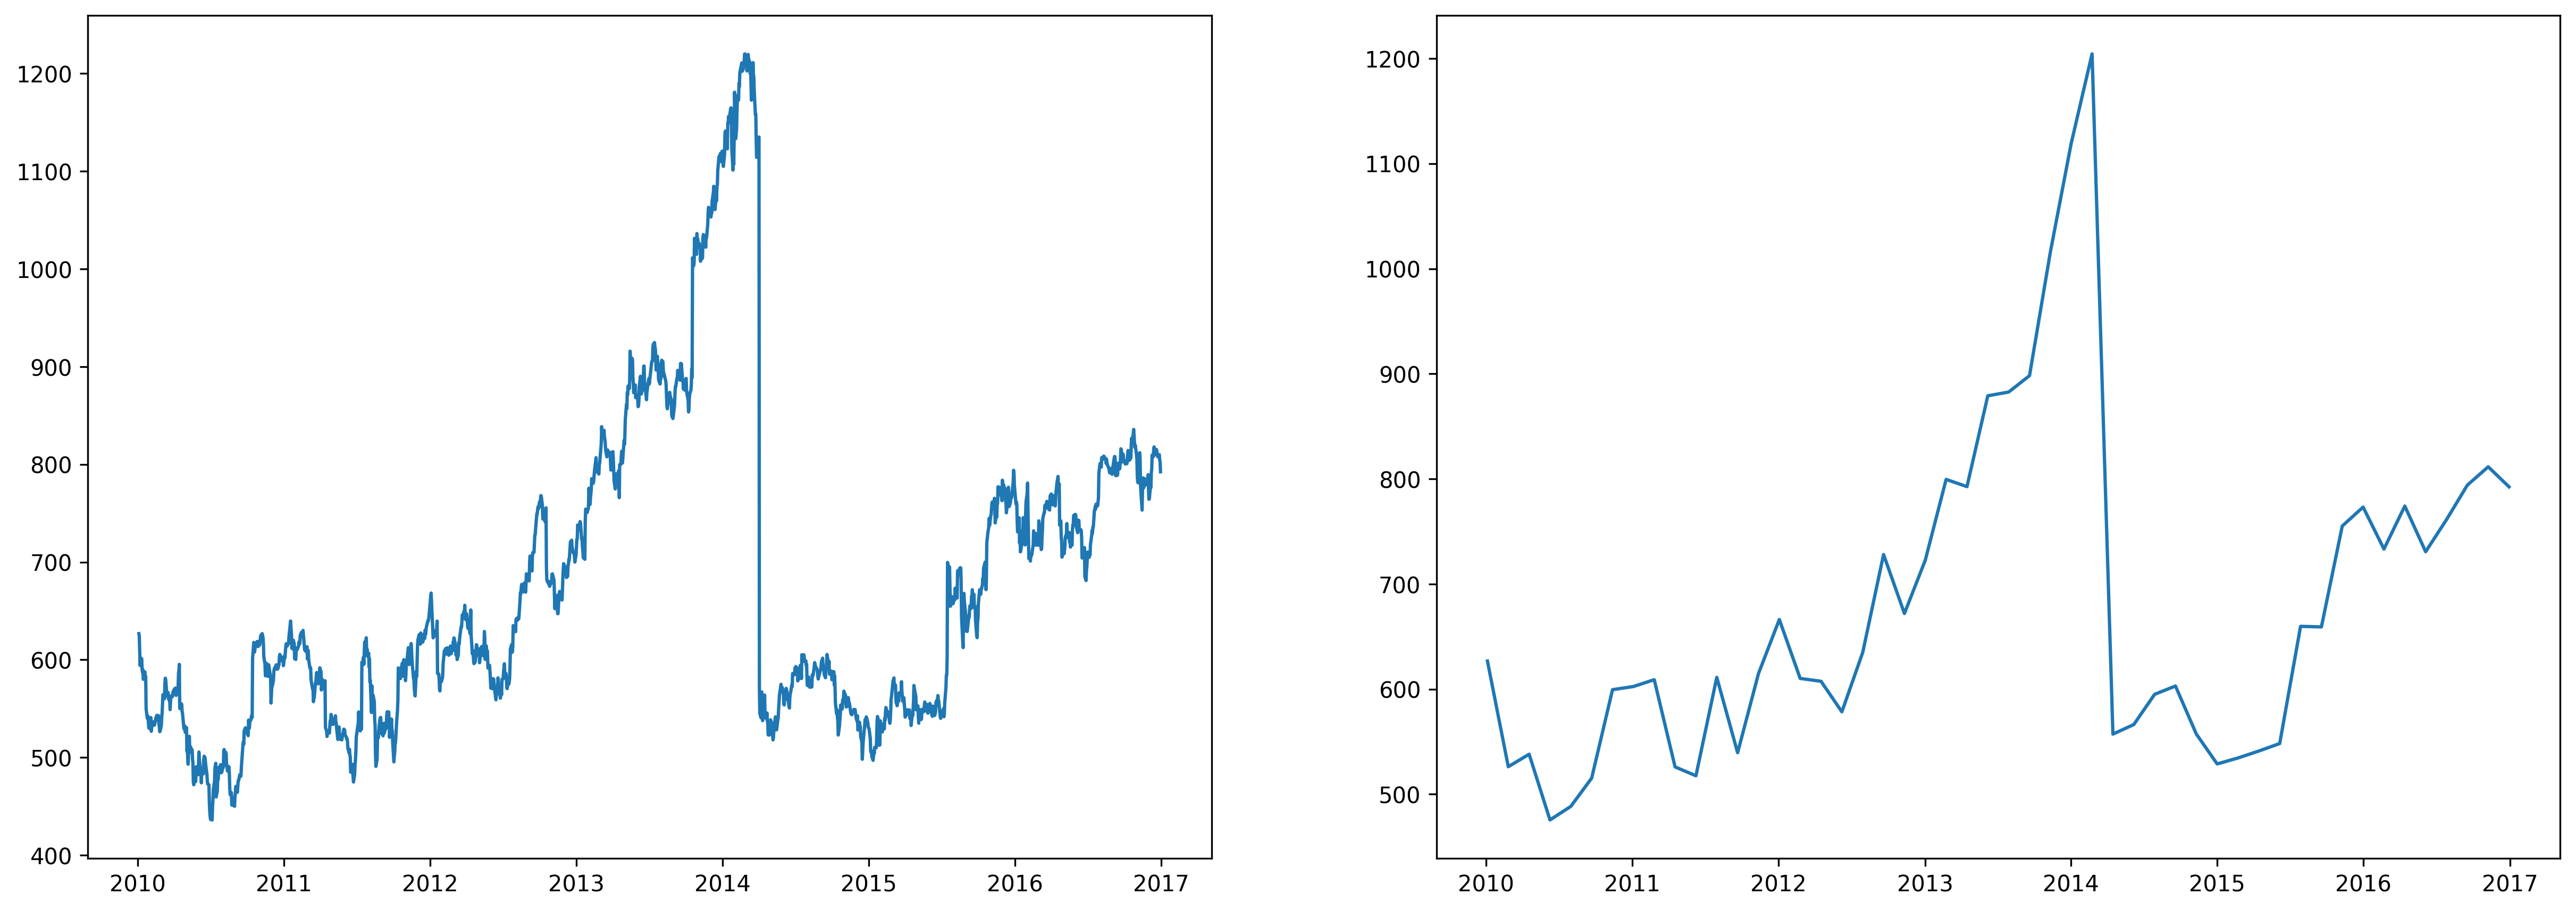

In [24]:
# 보간
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google.index
value_np = google['close']

date_num = dates.date2num(date_np)

# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

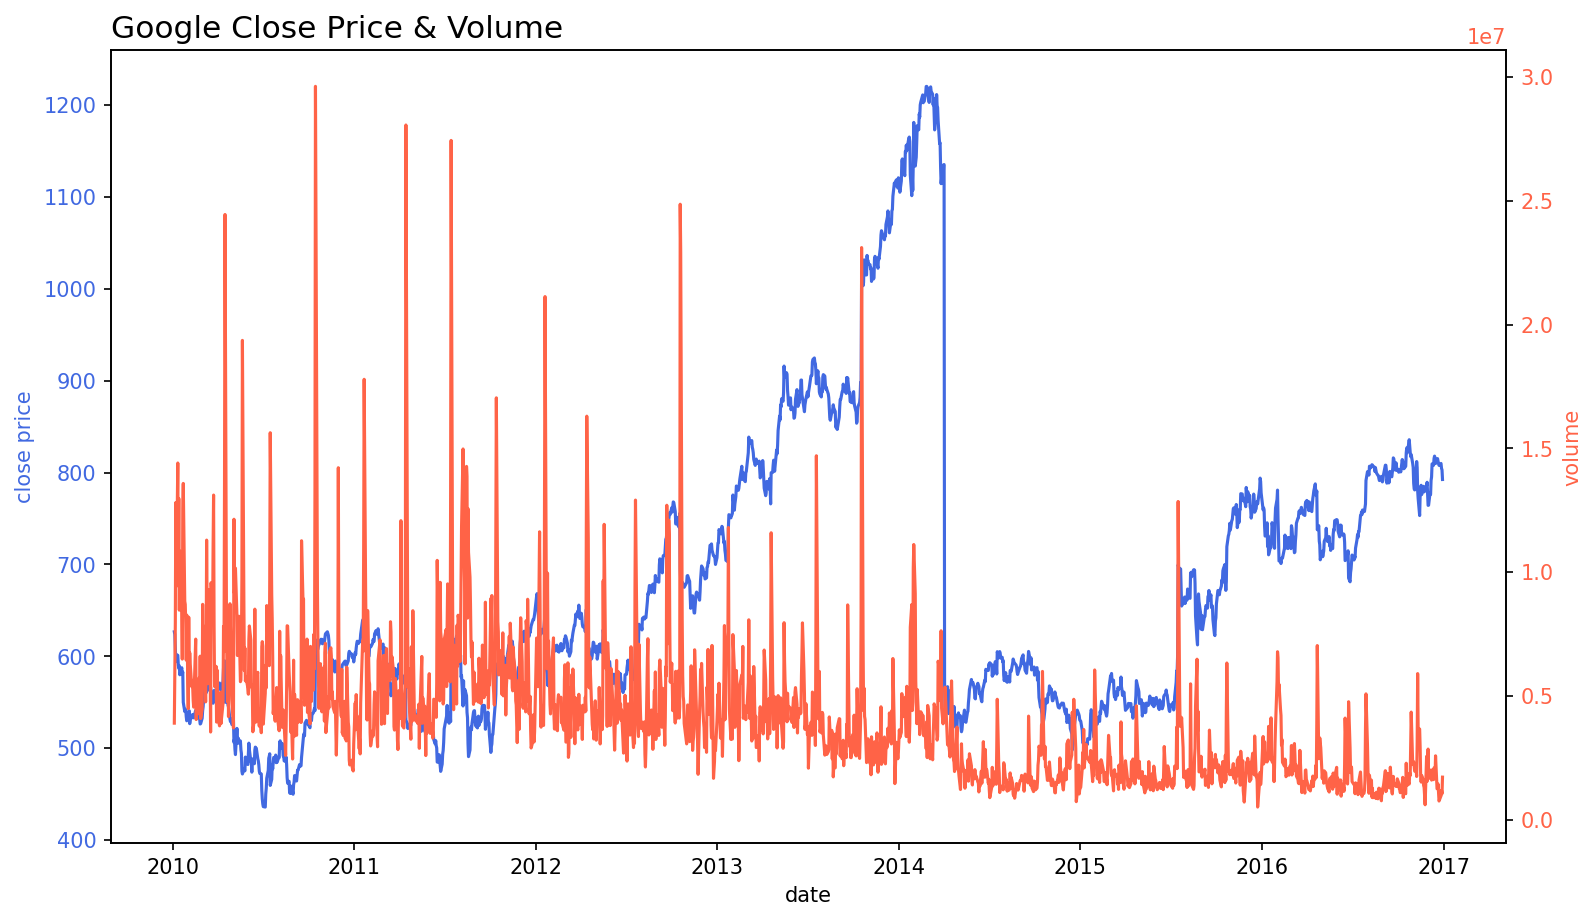

In [25]:
# 이중축 사용
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'

ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# # Second Plot
ax2 = ax1.twinx()  
color = 'tomato'

ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

secondary-xaxis() : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html

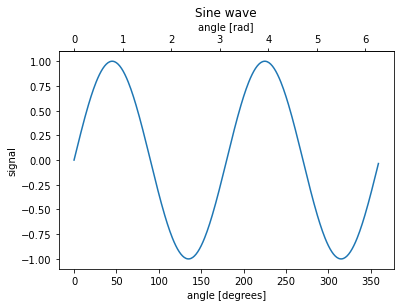

In [26]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()
x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()

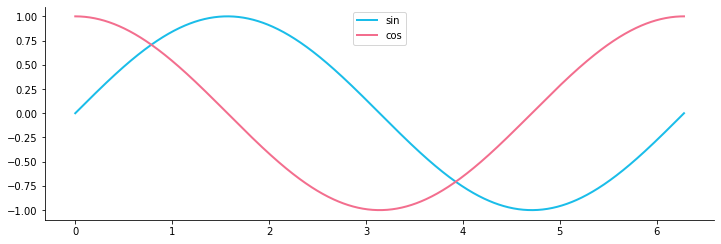

In [27]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)


ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2, label='sin')

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2, label='cos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper center')

plt.show()

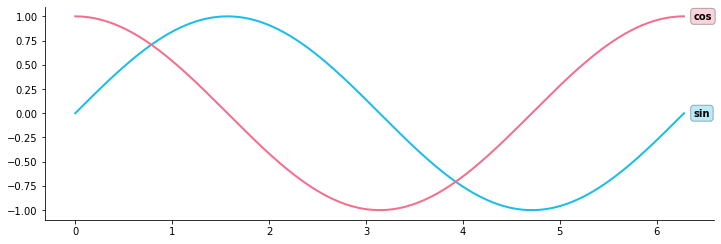

In [28]:

fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

# Ax2
ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2,)

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2,)

ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

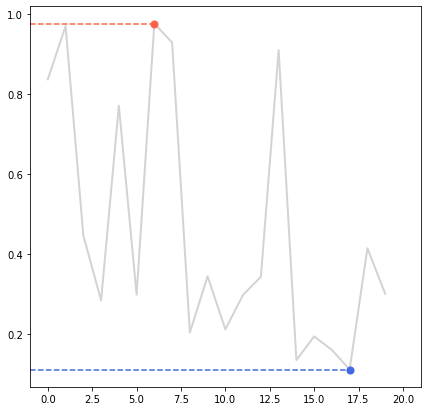

In [29]:
fig = plt.figure(figsize=(7, 7))

np.random.seed(97)

x = np.arange(20)
y = np.random.rand(20)

ax = fig.add_subplot(111)
ax.plot(x, y,
       color='lightgray',
       linewidth=2,)

ax.set_xlim(-1, 21)

# max
ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2,
        linestyle='--', color='tomato'
       )

ax.scatter(x[np.argmax(y)], np.max(y), 
            c='tomato',s=50, zorder=20)

# min
ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2,
        linestyle='--', color='royalblue'
       )
ax.scatter(x[np.argmin(y)], np.min(y), 
            c='royalblue',s=50, zorder=20)

plt.show()